## 解题

![](https://github.com/ChenDuBUAA/test/blob/master/part1.jpg)
![](https://github.com/ChenDuBUAA/test/blob/master/part2.jpg)

设随机变量$\Theta$、$\Phi$分别表示针与水平方向和竖直方向的夹角,向右、向上为正方向，则

$$\theta \in[0, \pi),\phi=\begin{cases}{\theta+\frac{\pi}{2},0\leq\theta<\frac{\pi}{2}} \\ {\theta-\frac{\pi}{2},\frac{\pi}{2}\leq\theta<\pi} \end{cases}$$

$\Theta$服从均匀分布，其概率密度函数为

$$f(\theta)=\begin{cases} 1/\pi,\theta\in[0,\pi) \\ 0,otherwise\end{cases}$$

设随机变量$X$、$Y$分别表示针的中点到水平直线和竖直直线的最短距离，独立同分布，其概率密度函数为

$$g(x)=\begin{cases} 2/t,x\in[0,t/2] \\ 0,otherwise\end{cases}$$

$$g(y)=\begin{cases} 2/t,y\in[0,t/2] \\ 0,otherwise\end{cases}$$

记事件针与水平方向的直线相交为A，事件针与竖直方向的直线相交为B，则需要满足几何约束

$$x\leq\frac{l}{2}sin\theta, y\leq\frac{l}{2}sin\phi$$

则可计算如下概率

$$P(A) = P(B) = \int_0^\pi \int_0^{\frac{l}{2}sin\theta} \frac{1}{\pi}\frac{2}{t} {\rm d}x{\rm d}\theta = \frac{2l}{\pi t}$$

$$P(A\cap B)=\int_0^\pi \int_0^{\frac{l}{2}sin\theta} \int_0^{\frac{l}{2}sin\phi} \frac{1}{\pi}\frac{2} {t}\frac{2}{t} {\rm d}y{\rm d}x{\rm d}\theta = \frac{l^2}{\pi t^2}$$

由加法公式，可得

$$P(A\cup B)=P(A)+P(B)-P(A\cap B) = \frac{4l}{\pi t}-\frac{l^2}{\pi t^2}$$

则投针与直线不相交的概率为

$$P(NotIntersecting) = 1 - P(A\cup B) = 1 - (\frac{4l}{\pi t}-\frac{l^2}{\pi t^2})$$

## 实验代码

prob_mc - prob_cal=
[ 0.00001331  0.00028331  0.00056331  0.00265331  0.00127331  0.00178331
 -0.00001669  0.00061331 -0.00023669  0.00156331  0.00057331 -0.00244669
 -0.00234669 -0.00055669  0.00144331  0.00028331  0.00027331 -0.00110669
 -0.00099669 -0.00083669 -0.00059669  0.00096331 -0.00073669 -0.00070669
 -0.00130669 -0.00052669  0.00165331  0.00139331 -0.00061669 -0.00178669
 -0.00060669  0.00069331 -0.00010669  0.00036331 -0.00044669 -0.00134669
  0.00029331 -0.00084669  0.00158331 -0.00047669 -0.00044669 -0.00163669
 -0.00005669 -0.00100669 -0.00165669 -0.00202669 -0.00058669 -0.00098669
 -0.00087669 -0.00111669 -0.00151669 -0.00066669 -0.00092669 -0.00030669
 -0.00112669 -0.00054669  0.00017331  0.00164331  0.00296331 -0.00057669
  0.00079331  0.00055331 -0.00092669  0.00019331  0.00040331 -0.00042669
  0.00108331  0.00083331  0.00155331 -0.00119669 -0.00169669  0.00085331
  0.00095331 -0.00049669  0.00045331 -0.00078669  0.00133331 -0.00047669
 -0.00029669 -0.00054669  0.000

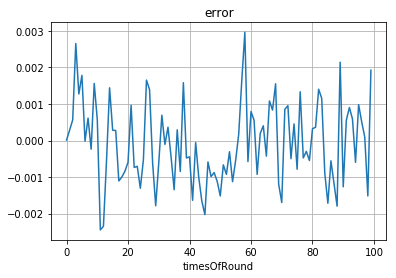

In [1]:
# coding:utf-8


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def exam_du_2015_2_3(t, l):
    # t: distance between lines
    # l: length of needle
    if t <= l or t <= 0 or l <= 0:
        return 0

    k = 0.0
    n = 100000

    x = np.random.uniform(0, t / 2.0, n)
    y = np.random.uniform(0, t / 2.0, n)
    theta = np.random.uniform(0, np.pi, n)

    pos_neg = np.ones(theta.shape)
    pos_neg[theta >= np.pi / 2] = -1
    phi = theta + np.pi / 2 * pos_neg

    for i in range(n):
        if x[i] <= l / 2.0 * np.sin(theta[i]) or y[i] <= l / 2.0 * np.sin(phi[i]):
            k += 1

    return 1.0 - k / n


if __name__ == '__main__':
    t_input = 1
    l_input = 0.8

    timesOfRound = 100
    prob_mc = []
    for i in range(timesOfRound):
        prob_mc.append(exam_du_2015_2_3(t_input, l_input))

    prob_cal = 1.0 - (4.0 * l_input / (np.pi * t_input) - l_input ** 2 / (np.pi * t_input ** 2))

    err = np.array(prob_mc) - prob_cal
    avg = abs(err).mean()
    np.set_printoptions(suppress=True)
    print('prob_mc - prob_cal=\n{}'.format(err))
    print('\nmean absolute error is:{}'.format(avg))

    plt.figure()
    index = np.array(range(timesOfRound))
    plt.plot(index, err)
    plt.title('error')
    plt.xlabel('timesOfRound')
    plt.grid(True)
    plt.show()